# Анализ полученных данных средствами Python

Получены файлы, в которых содержатся результаты запросов из предыдущих этапов проекта.

query_1.csv — результат первого запроса. В нём содержится информация о:   
- model — модели самолета   
- flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года

query_3.csv — результат третьего запроса. В нём содержится информация о:    
- city — городах
- average_flights — среднее количестве рейсов, прибывающих в город city за день в сентябре 2018 года

Для этих двух наборов данных нужно:
- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат

## Импорт библотек

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib as mpl

## Изучение данных

In [2]:
df1 = pd.read_csv('query_1.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [3]:
df1.head(5)

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300


In [4]:
df2 = pd.read_csv('query_3.csv').sort_values(by = 'average_flights', ascending = False)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 43 to 49
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB


In [5]:
df2.head(5)

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581


### Изменение типа данных

In [6]:
df2['average_flights'] = df2['average_flights'].astype('int')

In [7]:
df2.describe().astype('int')

,average_flights
count,101
mean,5
std,13
min,1
25%,2
50%,3
75%,5
max,129


## топ-10 городов по количеству рейсов

In [8]:
top10 = df2.sort_values(by='average_flights', ascending = False).head(10)
top10

,city,average_flights
43,Москва,129
70,Санкт-Петербург,31
54,Новосибирск,17
33,Красноярск,11
20,Екатеринбург,11
67,Ростов-на-Дону,10
63,Пермь,10
10,Брянск,10
73,Советский,9
84,Ульяновск,9


## Графики: 
 - модели самолетов и количество рейсов
 - города и количество рейсов
 - топ-10 городов и количество рейсов

### Количество рейсов по моделям

Text(0, 0.5, 'Модель самолёта')

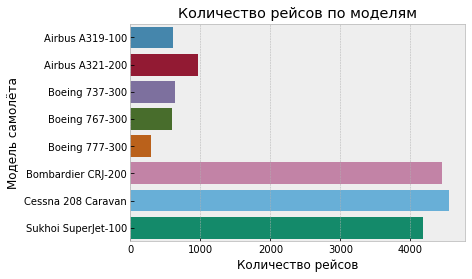

In [9]:
plt.style.use('bmh')
sns.barplot(x="flights_amount", y="model", data=df1)
plt.title('Количество рейсов по моделям')
plt.xlabel("Количество рейсов")
plt.ylabel("Модель самолёта")

### Количество рейсов по городам

Text(0, 0.5, 'Города')

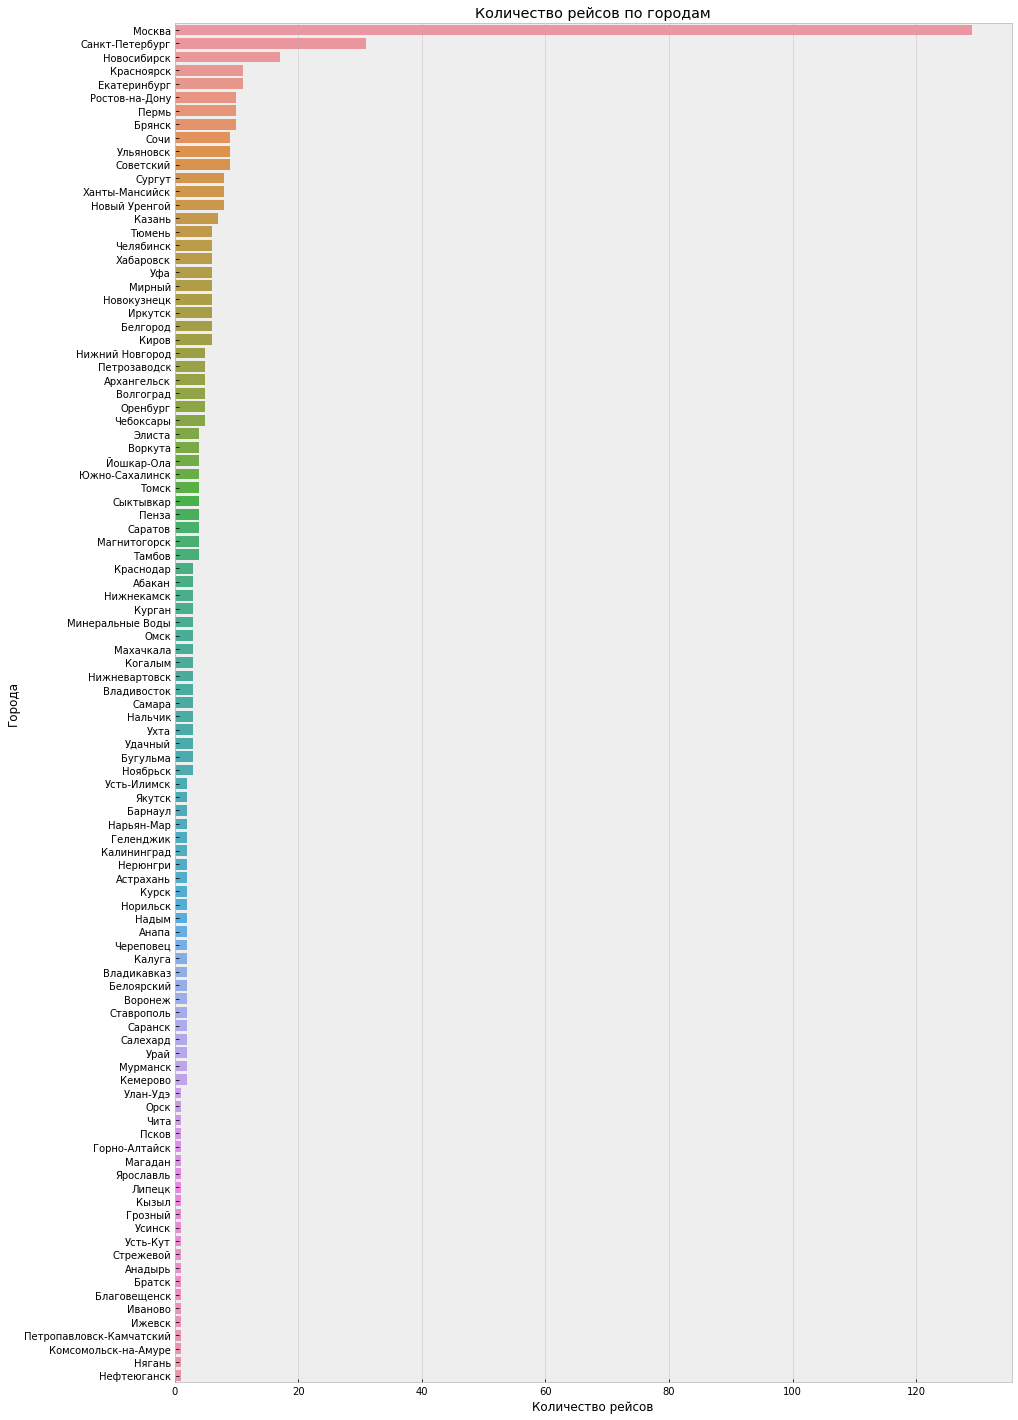

In [30]:
sns.barplot(x='average_flights', y='city', data=df2)
plt.rcParams['figure.figsize']=(15,25)
plt.title('Количество рейсов по городам')
plt.xlabel('Количество рейсов')
plt.ylabel('Города')

### Топ 10 городов по количеству рейсов

Text(0, 0.5, 'Города')

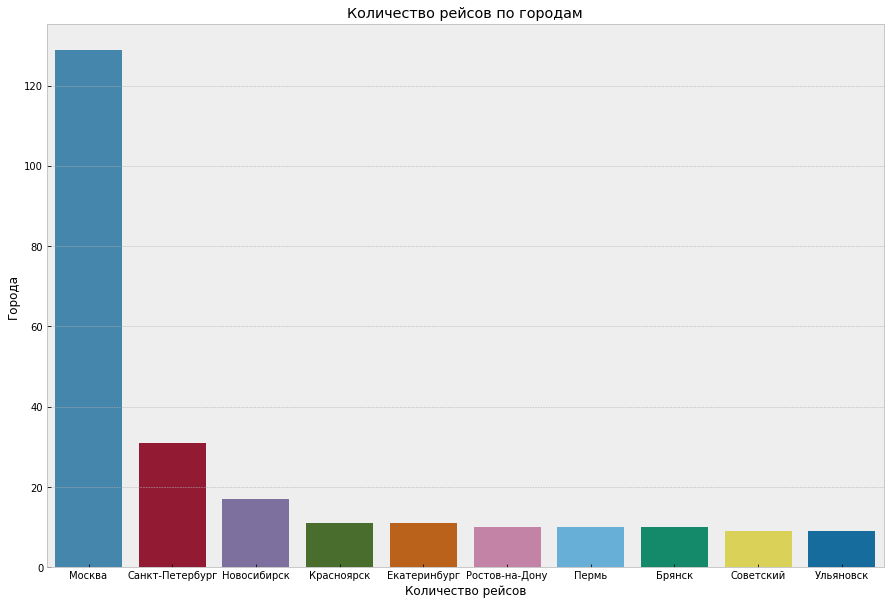

In [42]:
sns.barplot(x='city', y='average_flights', data=top10)
plt.rcParams['figure.figsize']=(15,10)
plt.title('Количество рейсов по городам')
plt.xlabel('Количество рейсов')
plt.ylabel('Города')

## Вывод 